In [17]:
import numpy as np
import pandas as pd
import matplotlib as mpl

from sklearn.linear_model import LinearRegression

In [18]:
housing = pd.read_csv(r'C:\Users\olofs\OneDrive\Skrivbord\DataScientist\Machine_Learning\Lecture_2_house_prices\housing.csv')

In [19]:
housing.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [20]:
housing.corr()

C:\Users\olofs\AppData\Local\Temp\ipykernel_34472\1598269145.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  housing.corr()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>]],
      dtype=object)

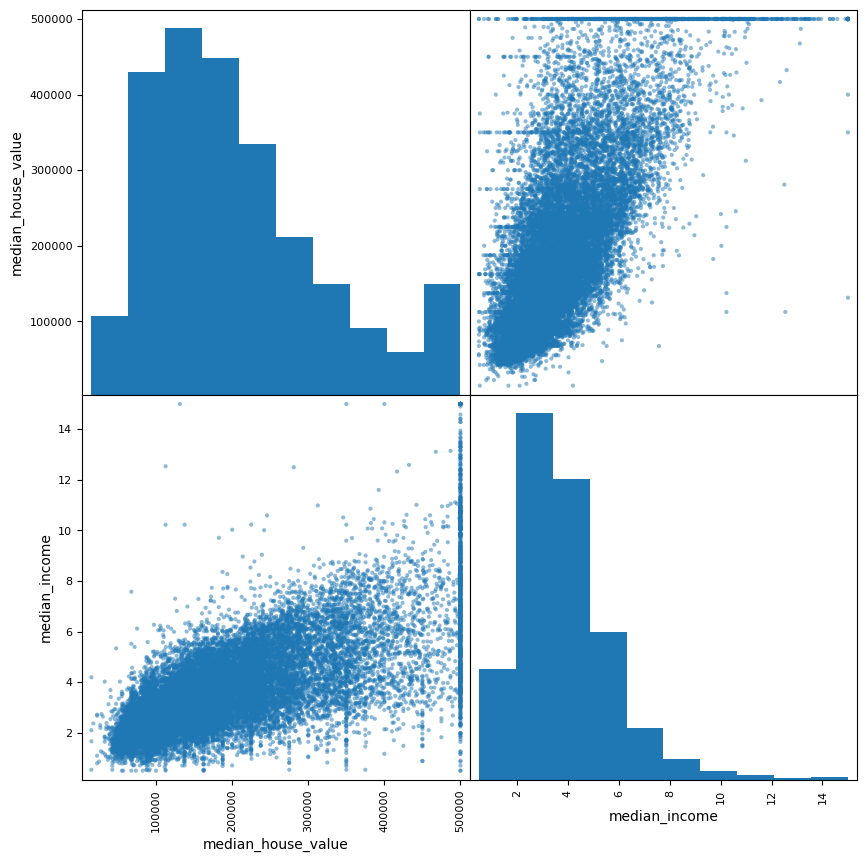

In [21]:
from pandas.plotting import scatter_matrix as sm

attributes = ['median_house_value', 'median_income']

sm(housing[attributes], figsize=(10,10))

In [22]:
housing['median_house_value'].value_counts()

500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
359200.0      1
54900.0       1
377600.0      1
81200.0       1
47000.0       1
Name: median_house_value, Length: 3842, dtype: int64

In [23]:
housing = housing.drop(['ocean_proximity'], axis=1)

In [24]:
X = housing.drop(['median_house_value'], axis=1)
y = housing['median_house_value']


In [25]:
print(X.shape)
print(y.shape)

(20640, 8)
(20640,)


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
print(X_train)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.03     32.71                33.0       3126.0           627.0   
8267     -118.16     33.77                49.0       3382.0           787.0   
17445    -120.48     34.66                 4.0       1897.0           331.0   
14265    -117.11     32.69                36.0       1421.0           367.0   
2271     -119.80     36.78                43.0       2382.0           431.0   
...          ...       ...                 ...          ...             ...   
11284    -117.96     33.78                35.0       1330.0           201.0   
11964    -117.43     34.02                33.0       3084.0           570.0   
5390     -118.38     34.03                36.0       2101.0           569.0   
860      -121.96     37.58                15.0       3575.0           597.0   
15795    -122.42     37.77                52.0       4226.0          1315.0   

       population  households  median_income  
1419

In [28]:
print(X_train.head())


y_train

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.03     32.71                33.0       3126.0           627.0   
8267     -118.16     33.77                49.0       3382.0           787.0   
17445    -120.48     34.66                 4.0       1897.0           331.0   
14265    -117.11     32.69                36.0       1421.0           367.0   
2271     -119.80     36.78                43.0       2382.0           431.0   

       population  households  median_income  
14196      2300.0       623.0         3.2596  
8267       1314.0       756.0         3.8125  
17445       915.0       336.0         4.1563  
14265      1418.0       355.0         1.9425  
2271        874.0       380.0         3.5542  


14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
           ...   
11284    229200.0
11964     97800.0
5390     222100.0
860      283500.0
15795    325000.0
Name: median_house_value, Length: 16512, dtype: float64

In [29]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
imp = SimpleImputer(strategy='mean')


# fit_transform on the training data, only transform on the test data.
# fit will change the output results of the trainsformers, menaing the results if we run
# fit_trainsform twice, will change. First time will yield a different result than the second time. 
X_train_imp = imp.fit_transform(X_train)
X_test_imp = imp.transform(X_test)
scaled_X_train = sc.fit_transform(X_train_imp)
scaled_X_test = sc.transform(X_test_imp)





In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


linreg = RandomForestRegressor()


linreg.fit(scaled_X_train, y_train)



KeyboardInterrupt: 

In [16]:
ypred = linreg.predict(scaled_X_test)

In [17]:
print(type(ypred))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>


In [18]:

from sklearn.metrics import mean_squared_error

In [19]:
meanss = mean_squared_error(ypred, y_test, squared=False)
meanss

49891.144929039016

In [20]:
beanss = housing['median_house_value'].mean()
beanss

206855.81690891474

In [21]:
meanss/beanss

0.24118802011261636